In [297]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(35)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [272]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.utils import class_weight
import scipy.stats as stats
from scipy.stats import shapiro, levene, kruskal, ttest_ind, f_oneway
from tabulate import tabulate

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

#Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

import joblib
import warnings
warnings.filterwarnings("ignore")

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [274]:
print(df.columns)
len(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


21

In [345]:
#How many null values in the columns
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [346]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [277]:
import numpy as np
features = np.array(df.columns)
print(features)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [299]:
import numpy as np
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.loc[df["TotalCharges"].str.contains(" "), "TotalCharges"] = np.nan#looks for any strings containing only a backspace
df.dropna(inplace=True) #Then dropping those cells in place is replaced with true.
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [300]:
print("Columns before any operation:")
print(df.columns)

# Check if 'customerID' exists and then drop it
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("'customerID' column dropped.")
else:
    print("'customerID' column not found.")

# Convert 'TotalCharges' to numeric (float64)
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = df['TotalCharges'].astype('float64')
    print("'TotalCharges' column converted to float64.")
else:
    print("'TotalCharges' column not found.")

# Display the first few rows of the updated dataframe
print("Updated DataFrame:")
print(df.head())
df.info()

Columns before any operation:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
'customerID' column dropped.
'TotalCharges' column converted to float64.
Updated DataFrame:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service  

In [302]:
print("##################### Types #####################")
print(df.dtypes)
print("##################### Duplicated Values #####################")
print(df.duplicated().sum())
print("##################### Missing Values #####################")
print(df.isnull().sum())
print("##################### Number of Unique Values #####################")
print(df.nunique())

##################### Types #####################
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
##################### Duplicated Values #####################
22
##################### Missing Values #####################
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSuppor

In [303]:
# Encode the variables individually 
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 2, 'No': 0, 'Yes': 1})
df['InternetService'] = df['InternetService'].map({'Fiber optic': 2, 'No': 0, 'DSL': 1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 2, 'No internet service': 0, 'Yes': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No': 2, 'No internet service': 0, 'Yes': 1})

df['DeviceProtection'] = df['DeviceProtection'].map({'No': 2, 'No internet service': 0, 'Yes': 1})
df['TechSupport'] = df['TechSupport'].map({'No': 2, 'No internet service': 0, 'Yes': 1})
df['StreamingTV'] = df['StreamingTV'].map({'No': 2, 'No internet service': 0, 'Yes': 1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 2, 'No internet service': 0, 'Yes': 1})
df['Contract'] = df['Contract'].map({'Month-to-month': 2, 'One year': 0, 'Two year': 1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 0})

# One-hot encode categorical variables with drop_first=True t
# Display the first few rows of the updated dataframe



In [233]:
'''df["TotalCharges"] = df["TotalCharges"].astype("float64")'''
df.head(45)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0              0        1           0       1             0   
1        1              0        0           0      34             1   
2        1              0        0           0       2             1   
3        1              0        0           0      45             0   
4        0              0        0           0       2             1   
5        0              0        0           0       8             1   
6        1              0        0           1      22             1   
7        0              0        0           0      10             0   
8        0              0        1           0      28             1   
9        1              0        0           1      62             1   
10       1              0        1           1      13             1   
11       1              0        0           0      16             1   
12       1              0        1           0      58             1   
13       1              0        0           0      49             1   
14       1              0        0           0      25             1   
15       0              0        1           1      69             1   
16       0              0        0           0      52             1   
17       1              0        0           1      71             1   
18       0              0        1           1      10             1   
19       0              0        0           0      21             1   
20       1              1        0           0       1             0   
21       1              0        1           0      12             1   
22       1              0        0           0       1             1   
23       0              0        1           0      58             1   
24       1              0        1           1      49             1   
25       0              0        0           0      30             1   
26       1              0        1           1      47             1   
27       1              0        1           1       1             0   
28       1              0        1           0      72             1   
29       0              0        0           1      17             1   
30       0              1        1           0      71             1   
31       1              1        1           0       2             1   
32       0              0        1           1      27             1   
33       1              0        0           0       1             1   
34       1              1        0           0       1             1   
35       0              0        1           1      72             1   
36       1              0        0           0       5             1   
37       0              0        0           0      46             1   
38       1              0        0           0      34             1   
39       0              0        0           0      11             1   
40       1              0        1           1      10             1   
41       0              0        1           1      70             1   
42       0              0        1           1      17             1   
43       0              0        0           0      63             1   
44       0              0        1           0      13             1   

    MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0               2                1               2             1   
1               0                1               1             2   
2               0                1               1             1   
3               2                1               1             2   
4               0                2               2             2   
5               1                2               2             2   
6               1                2               2             1   
7               2                1               1             2   
8               1                2               2             2   
9          

In [304]:
#The grab_col_names function is designed to categorize the columns of a DataFrame into 
#different types: categorical, numerical, and categorical but cardinal (having many unique values).
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

# Display the first few rows of the updated dataframe
print(df.head(12))
'''Categorical Columns (cat_cols): Columns with data type 'object'.
Numerical but Categorical Columns (num_but_cat): Columns with numerical data types but 
fewer unique values than the cat_th threshold.
Categorical but Cardinal Columns (cat_but_car): Columns with categorical data types but
more unique values than the car_th threshold.'''


Observations: 7032
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 17
    gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0              0        1           0       1             0   
1        1              0        0           0      34             1   
2        1              0        0           0       2             1   
3        1              0        0           0      45             0   
4        0              0        0           0       2             1   
5        0              0        0           0       8             1   
6        1              0        0           1      22             1   
7        0              0        0           0      10             0   
8        0              0        1           0      28             1   
9        1              0        0           1      62             1   
10       1              0        1           1      13             1   
11       1              0        0           0 

"Categorical Columns (cat_cols): Columns with data type 'object'.\nNumerical but Categorical Columns (num_but_cat): Columns with numerical data types but \nfewer unique values than the cat_th threshold.\nCategorical but Cardinal Columns (cat_but_car): Columns with categorical data types but\nmore unique values than the car_th threshold."

In [283]:
#Data Visualisations
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                1               2             1   
1              0                1               1             2   
2              0                1               1             1   
3              2                1               1             2   
4              0                2               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         2   
1                 1            2            2                2         0   
2                 2            2            2                2         2   
3                 1            1            2                2         0   
4                 2            2            2                2         2   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              3           29.85         29.85      0  
1                 0              2           56.95       1889.50      0  
2                 1              2           53.85        108.15      1  
3                 0              1           42.30       1840.75      0  
4                 1              3           70.70        151.65      1

        gender      Ratio
gender                   
1         3549  50.469283
0         3483  49.530717


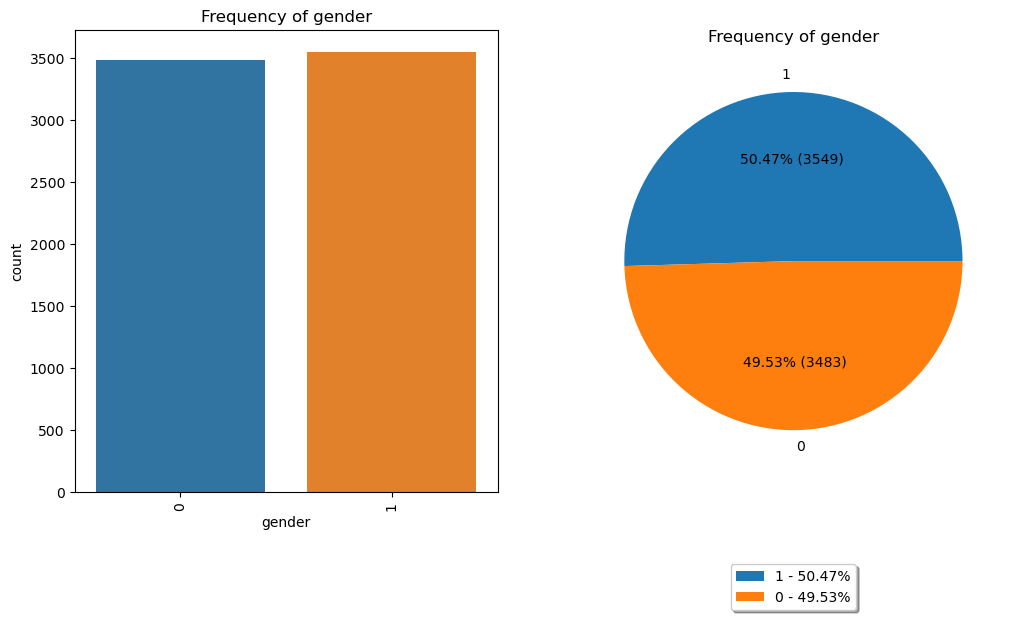

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5890  83.759954
1                       1142  16.240046


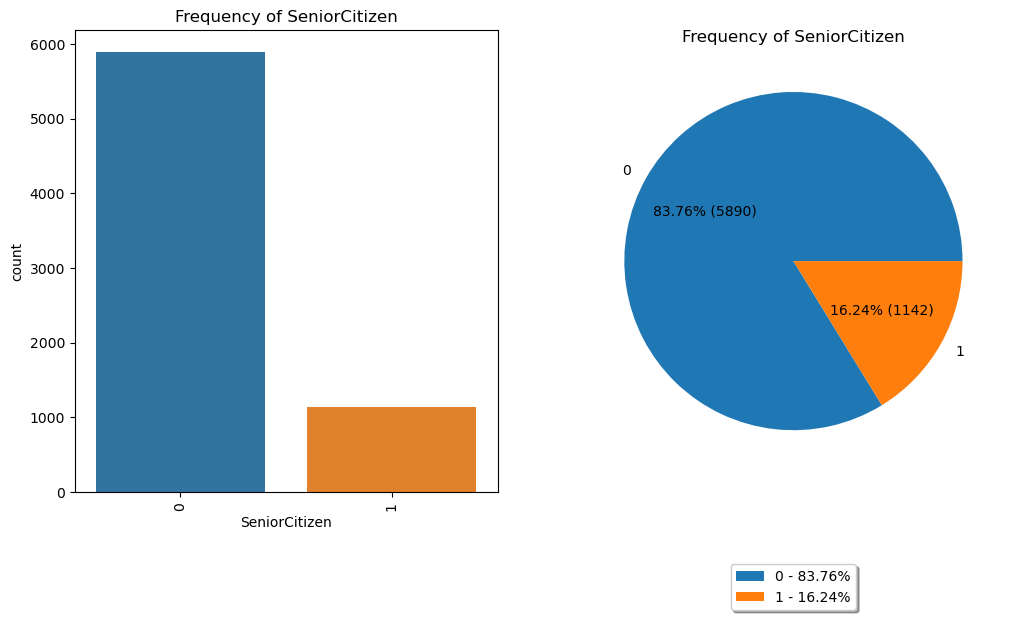

         Partner      Ratio
Partner                    
0           3639  51.749147
1           3393  48.250853


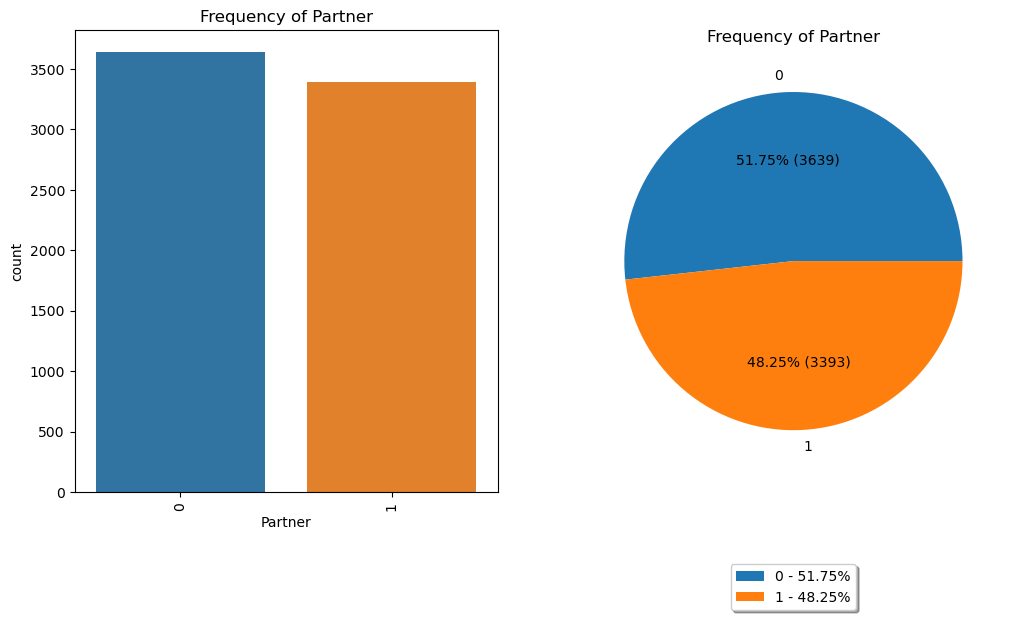

            Dependents      Ratio
Dependents                       
0                 4933  70.150739
1                 2099  29.849261


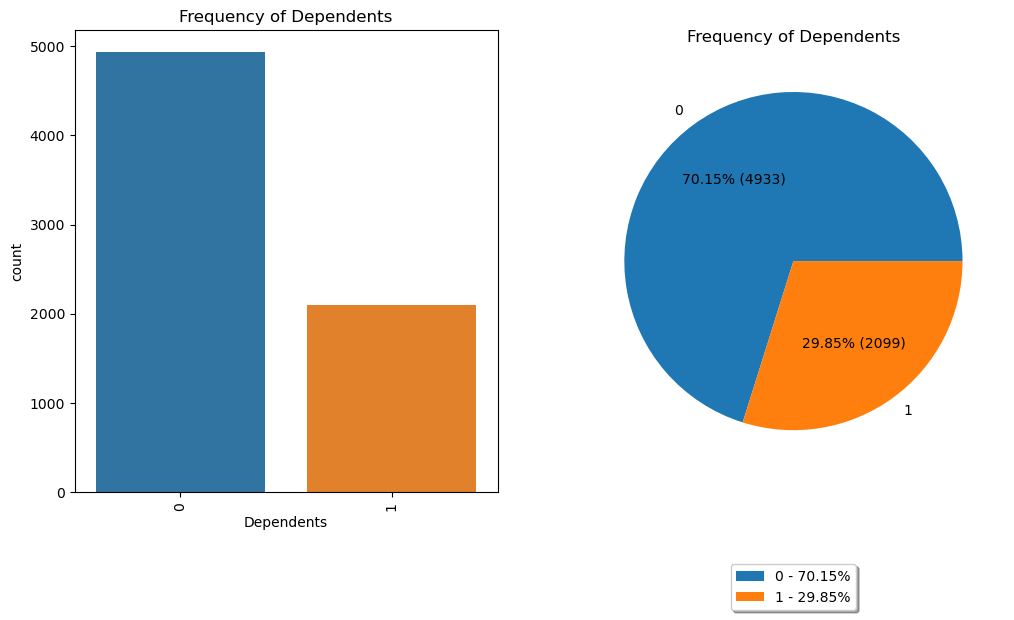

        tenure     Ratio
tenure                  
1          613  8.717292
72         362  5.147895
2          238  3.384528
3          200  2.844141
4          176  2.502844
...        ...       ...
38          59  0.839022
28          57  0.810580
39          56  0.796359
44          51  0.725256
36          50  0.711035

[72 rows x 2 columns]


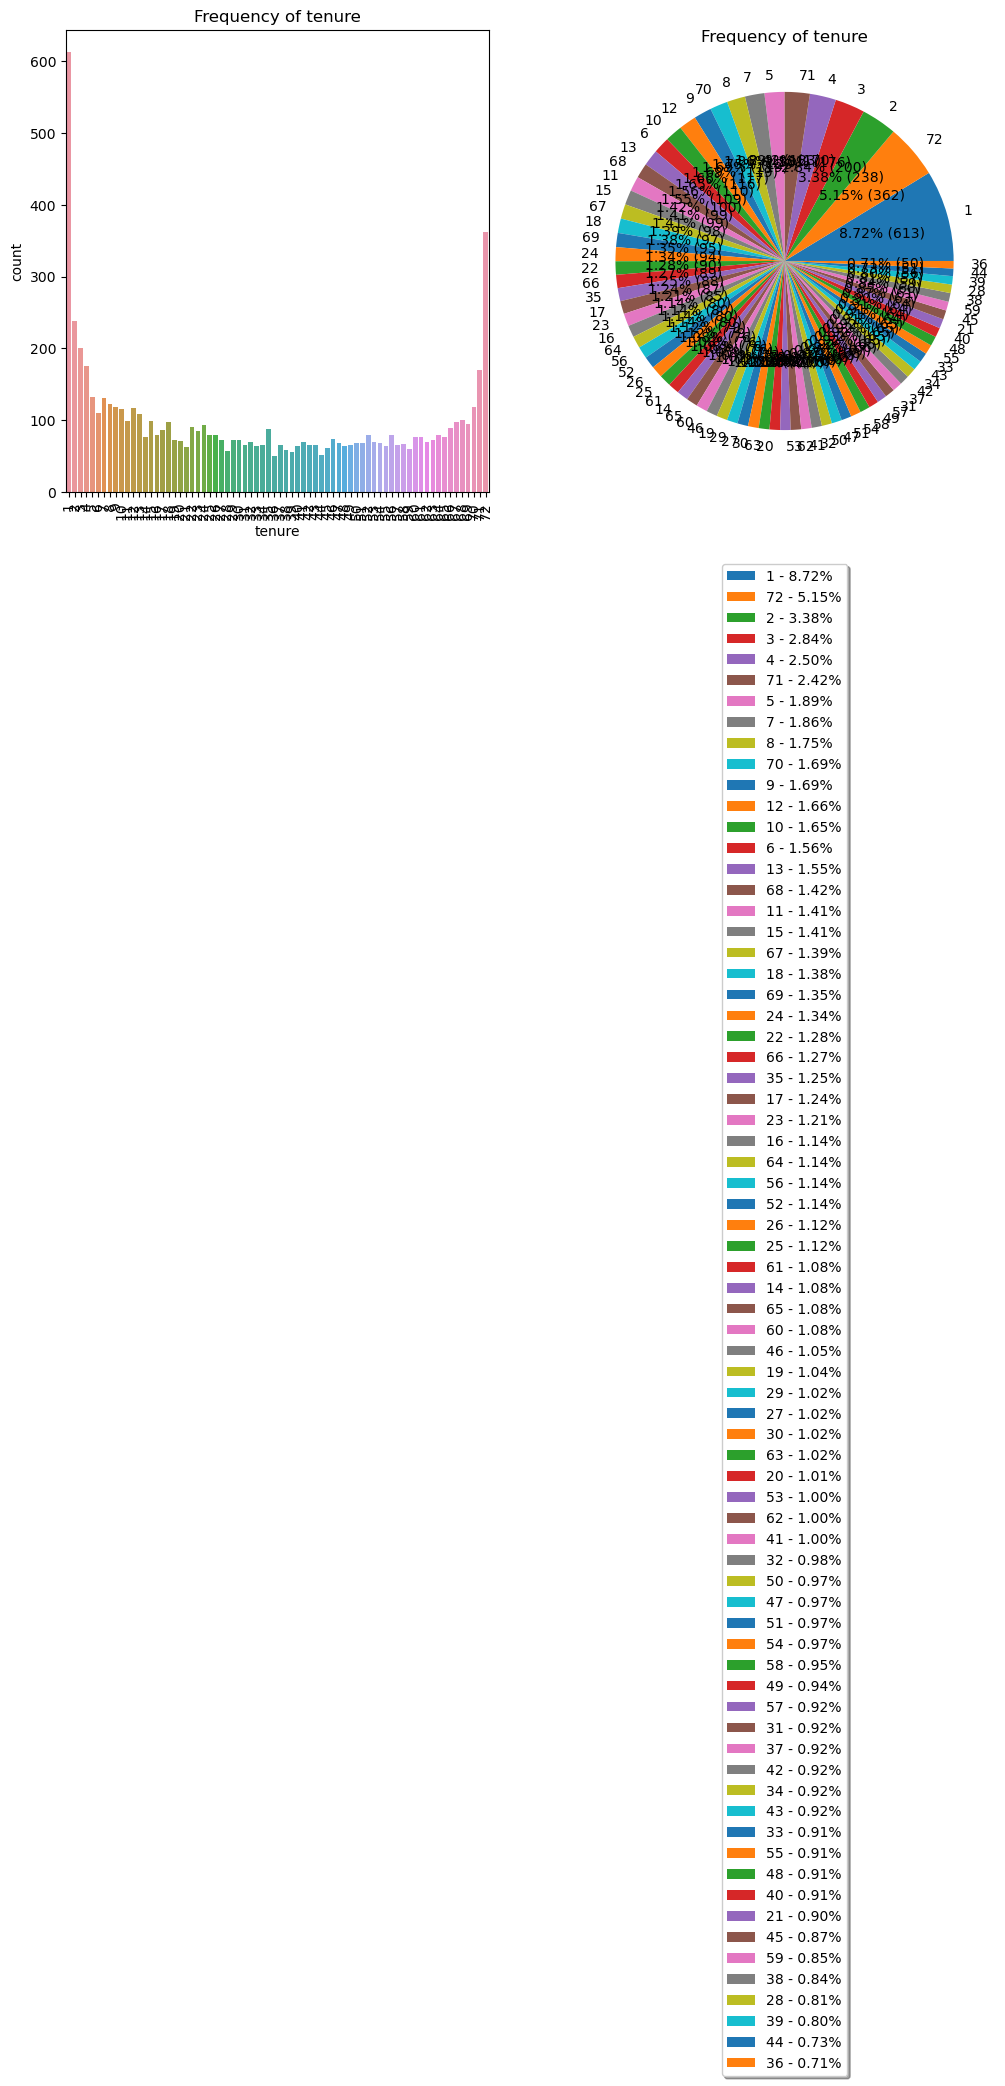

              PhoneService     Ratio
PhoneService                        
1                     6352  90.32992
0                      680   9.67008


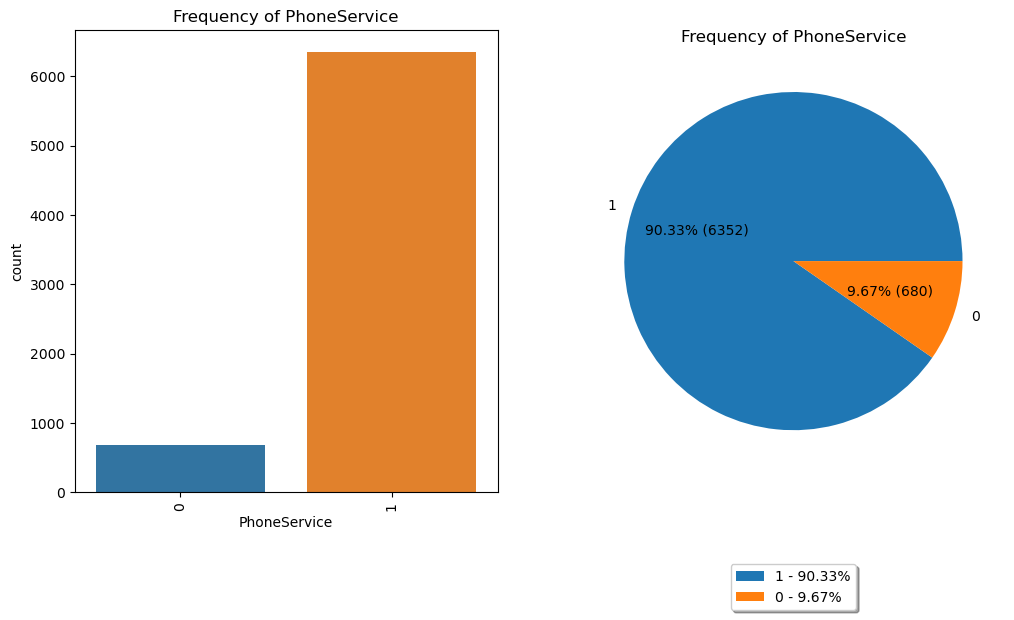

               MultipleLines      Ratio
MultipleLines                          
0                       3385  48.137088
1                       2967  42.192833
2                        680   9.670080


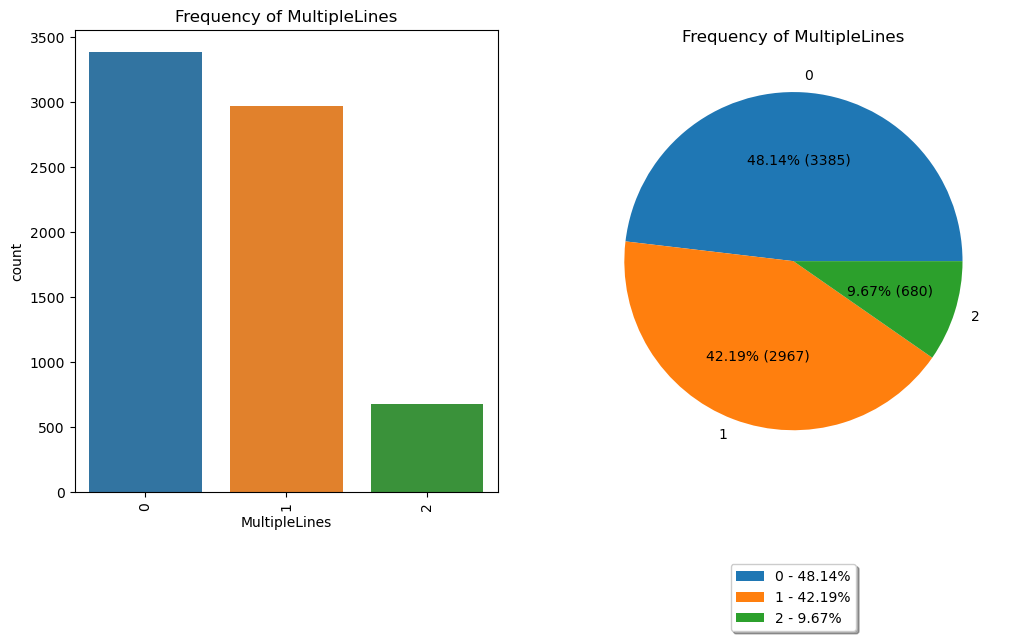

                 InternetService      Ratio
InternetService                            
2                           3096  44.027304
1                           2416  34.357224
0                           1520  21.615472


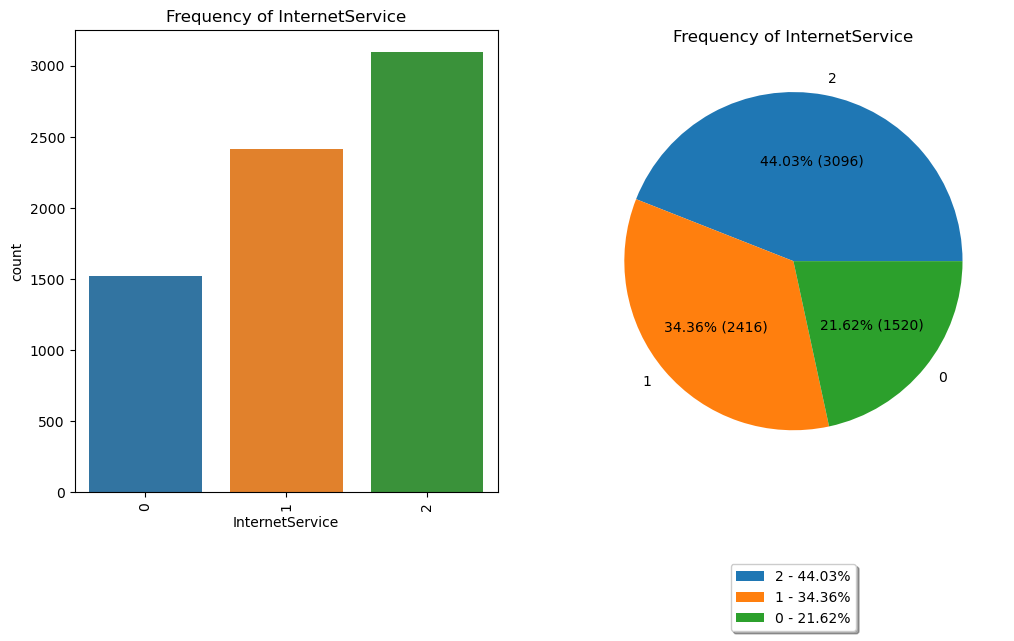

                OnlineSecurity      Ratio
OnlineSecurity                           
2                         3497  49.729807
1                         2015  28.654721
0                         1520  21.615472


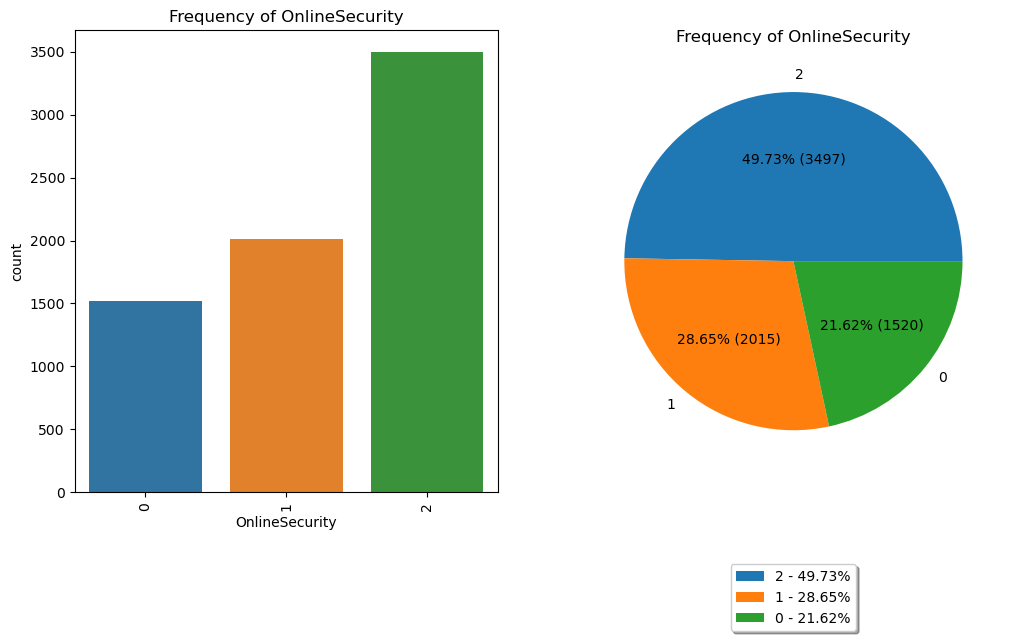

              OnlineBackup      Ratio
OnlineBackup                         
2                     3087  43.899317
1                     2425  34.485210
0                     1520  21.615472


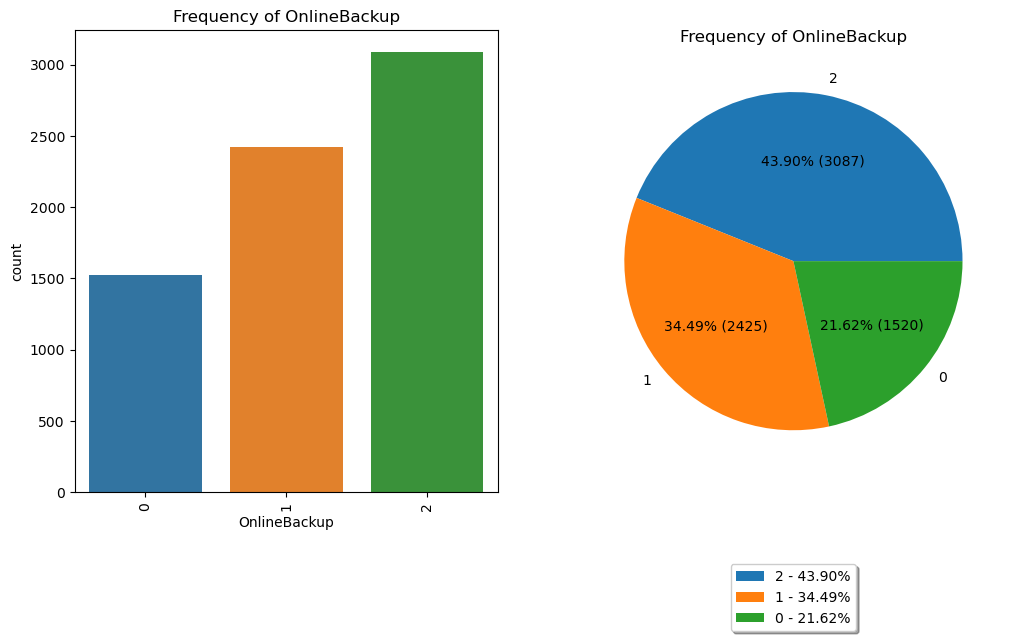

                  DeviceProtection      Ratio
DeviceProtection                             
2                             3094  43.998862
1                             2418  34.385666
0                             1520  21.615472


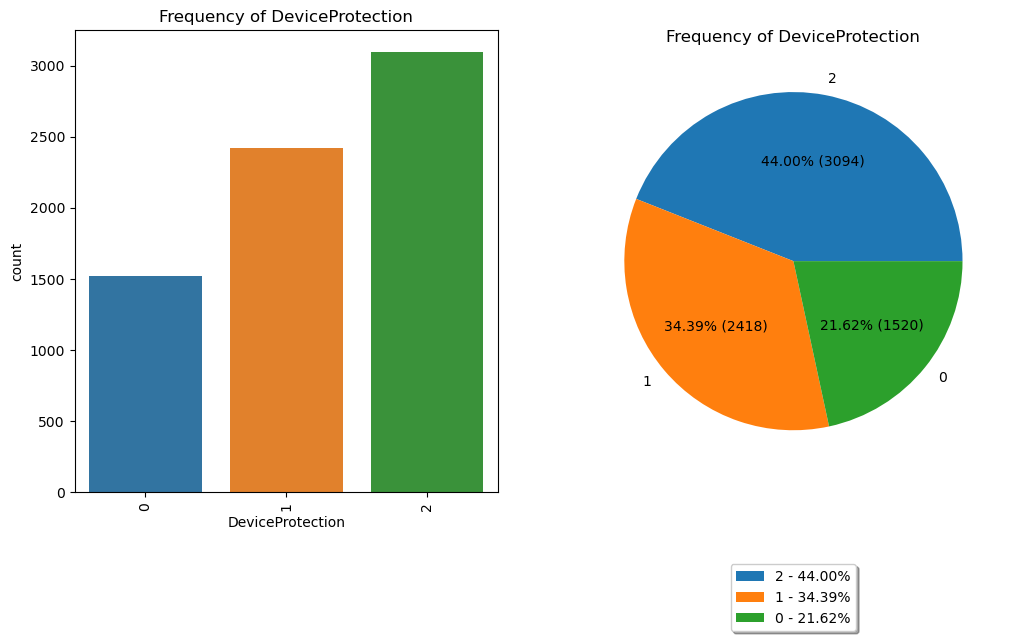

             TechSupport      Ratio
TechSupport                        
2                   3472  49.374289
1                   2040  29.010239
0                   1520  21.615472


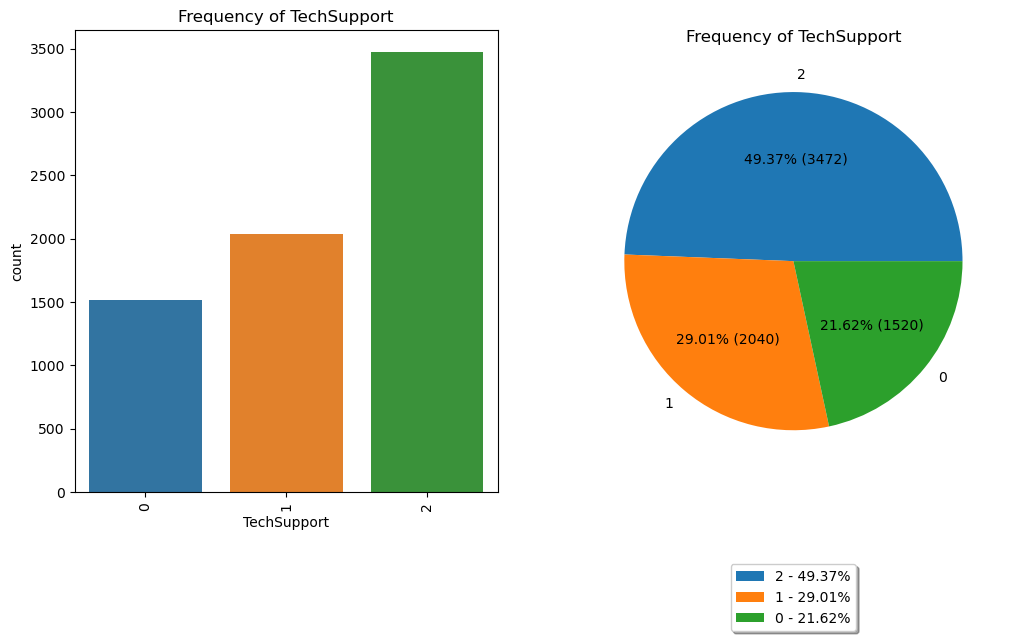

             StreamingTV      Ratio
StreamingTV                        
2                   2809  39.945961
1                   2703  38.438567
0                   1520  21.615472


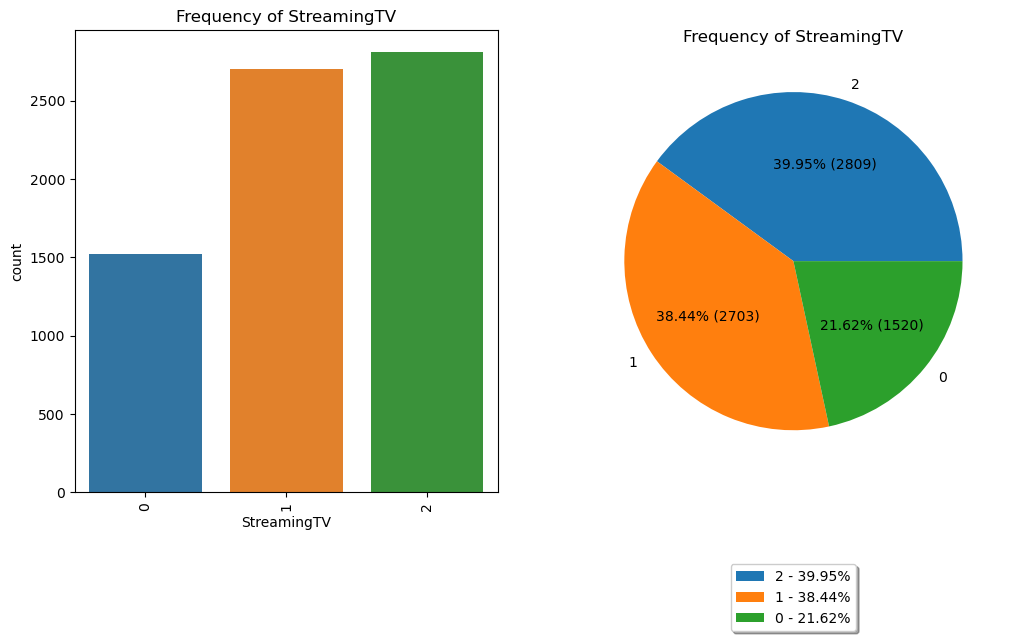

                 StreamingMovies      Ratio
StreamingMovies                            
2                           2781  39.547782
1                           2731  38.836746
0                           1520  21.615472


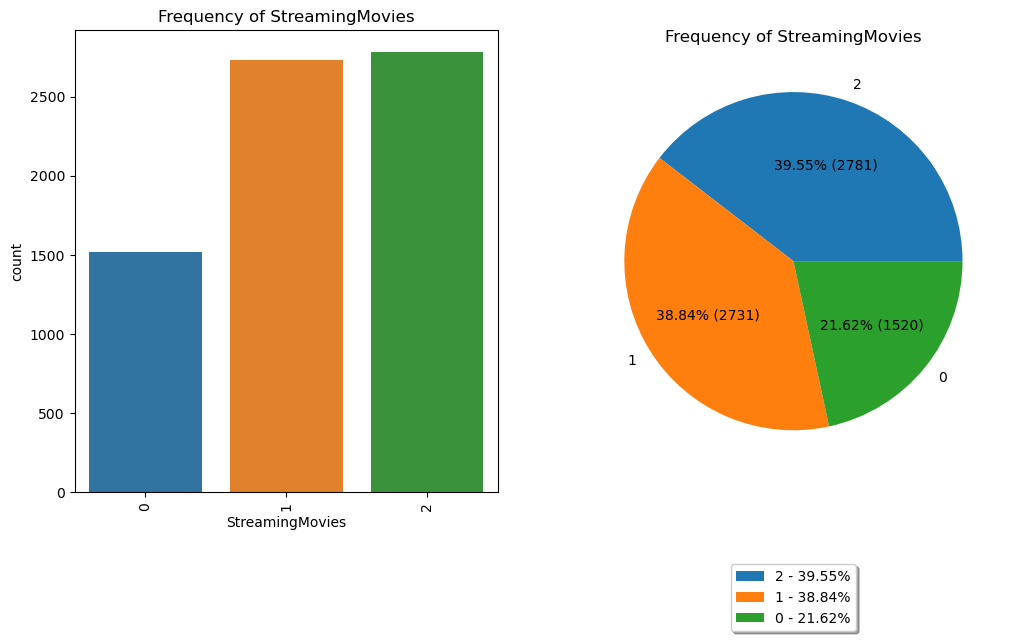

          Contract      Ratio
Contract                     
2             3875  55.105233
1             1685  23.961889
0             1472  20.932878


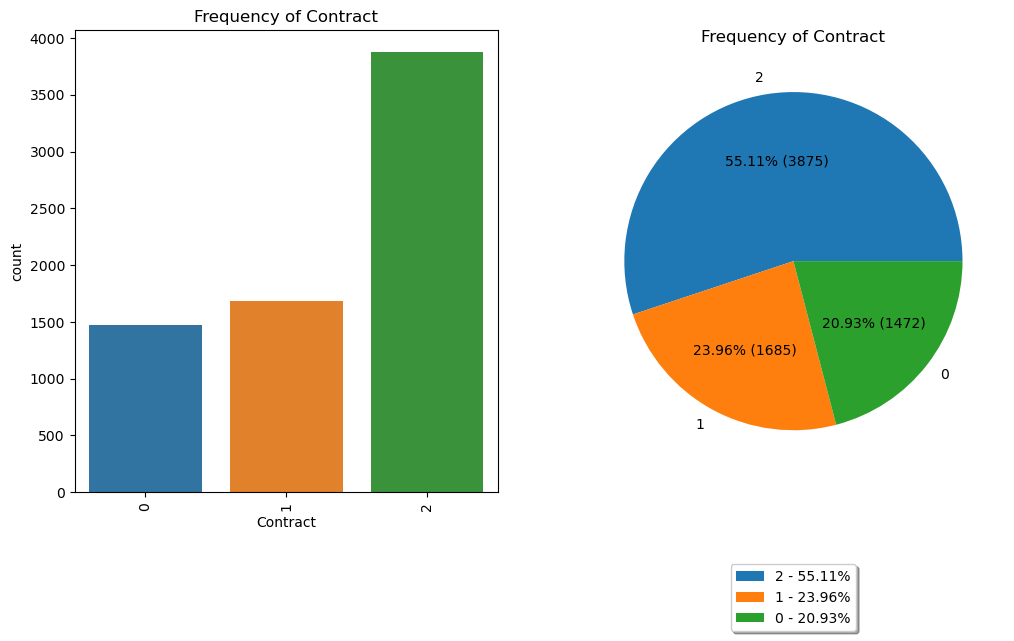

                  PaperlessBilling    Ratio
PaperlessBilling                           
1                             4168  59.2719
0                             2864  40.7281


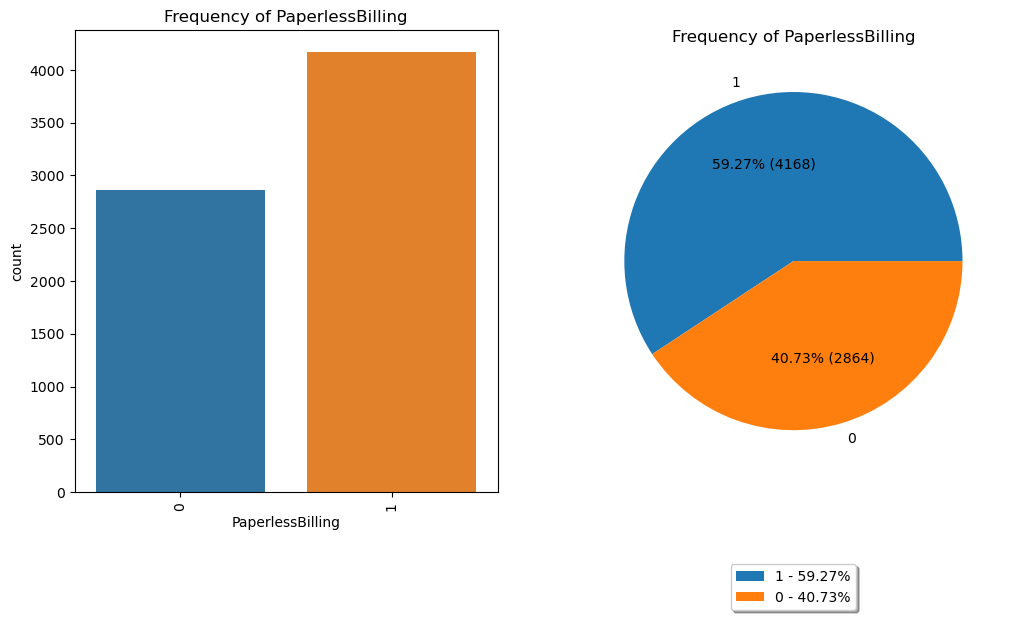

               PaymentMethod      Ratio
PaymentMethod                          
3                       2365  33.631968
2                       1604  22.810011
1                       1542  21.928328
0                       1521  21.629693


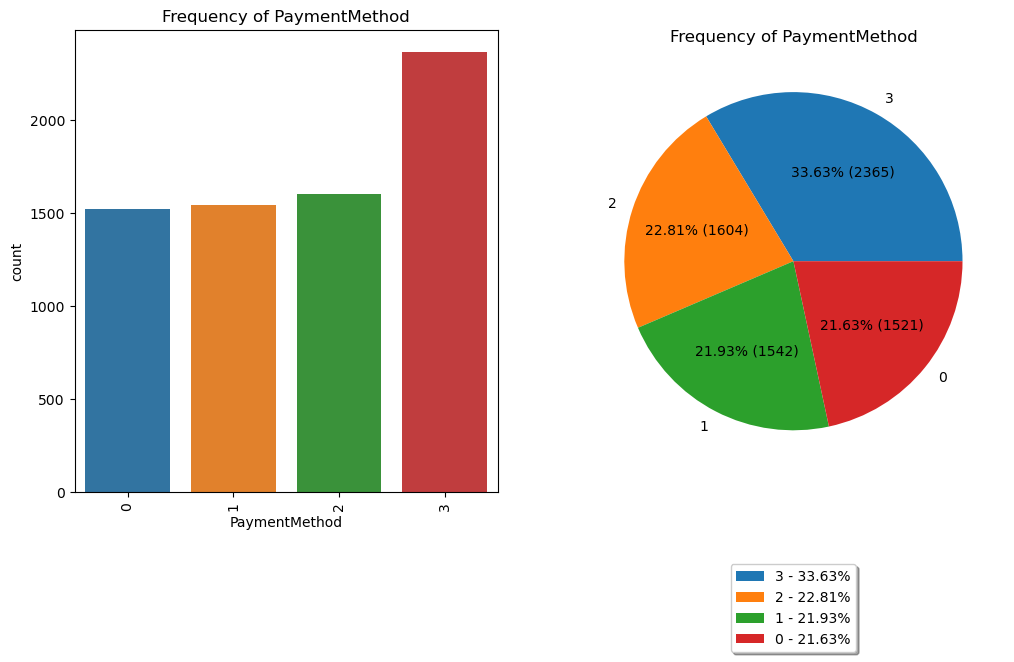

                MonthlyCharges     Ratio
MonthlyCharges                          
20.05                       61  0.867463
19.90                       44  0.625711
19.95                       44  0.625711
19.85                       44  0.625711
19.65                       43  0.611490
...                        ...       ...
23.65                        1  0.014221
114.70                       1  0.014221
43.65                        1  0.014221
87.80                        1  0.014221
78.70                        1  0.014221

[1584 rows x 2 columns]


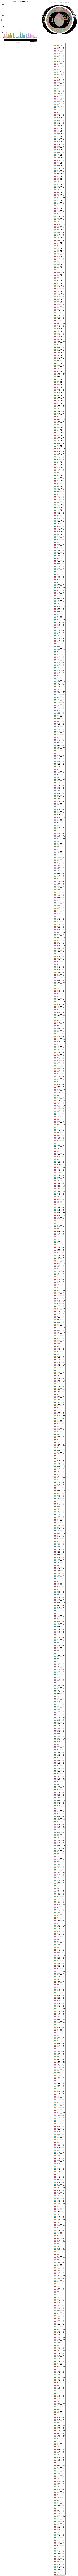

              TotalCharges     Ratio
TotalCharges                        
20.20                   11  0.156428
19.75                    9  0.127986
20.05                    8  0.113766
19.90                    8  0.113766
19.65                    8  0.113766
...                    ...       ...
6849.40                  1  0.014221
692.35                   1  0.014221
130.15                   1  0.014221
3211.90                  1  0.014221
6844.50                  1  0.014221

[6530 rows x 2 columns]


ValueError: Image size of 1029x137345 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 2 Axes>

       Churn      Ratio
Churn                  
0       5163  73.421502
1       1869  26.578498


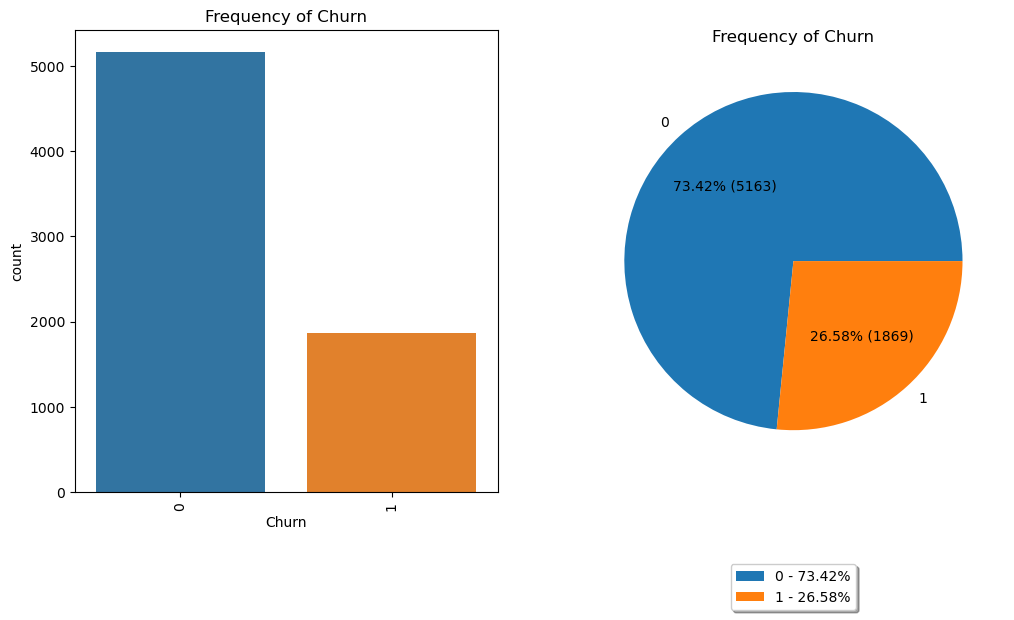

In [305]:
#The cat_summary function summarizes the categorical columns by displaying their value counts and 
#optionally plots the distribution.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def cat_summary(dataframe, col_name, plot=False):
    #Checking if column in frame
    if col_name not in dataframe.columns:
        print(f"Column '{col_name}' does not exist in the DataFrame.")
        return
#This part calculates the count of each unique value in the column (value_counts()).
#The ratio of each unique value to the total number of rows in the DataFrame (in percentage).
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
#Plotting the frequency data side by side to show how many times the unique values show up
    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

# Example usage
# Assuming df is your DataFrame
cat_cols = [str(col) for col in df.columns]

for col in cat_cols:
    cat_summary(df, col, True)


count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.800000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


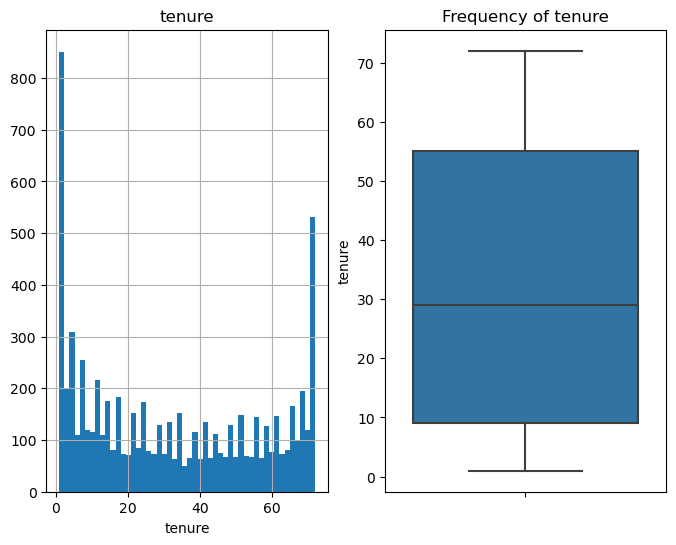

#####################################
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.900000
40%        58.920000
50%        70.350000
60%        79.150000
70%        85.535000
80%        94.300000
90%       102.645000
95%       107.422500
99%       114.734500
max       118.750000
Name: MonthlyCharges, dtype: float64


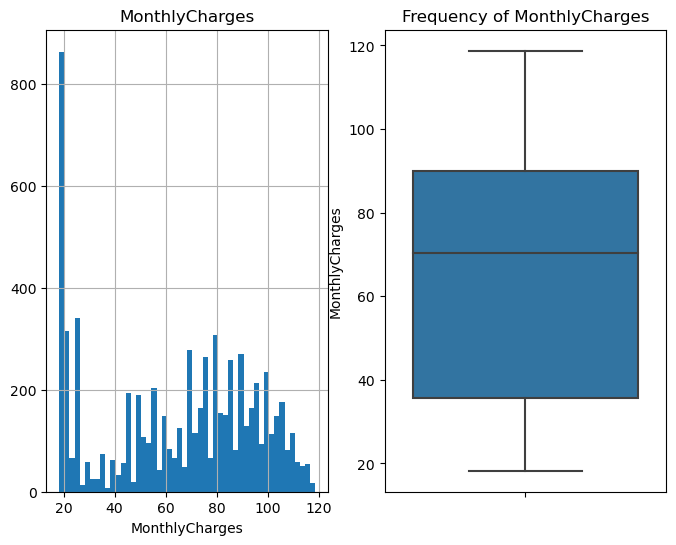

#####################################
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


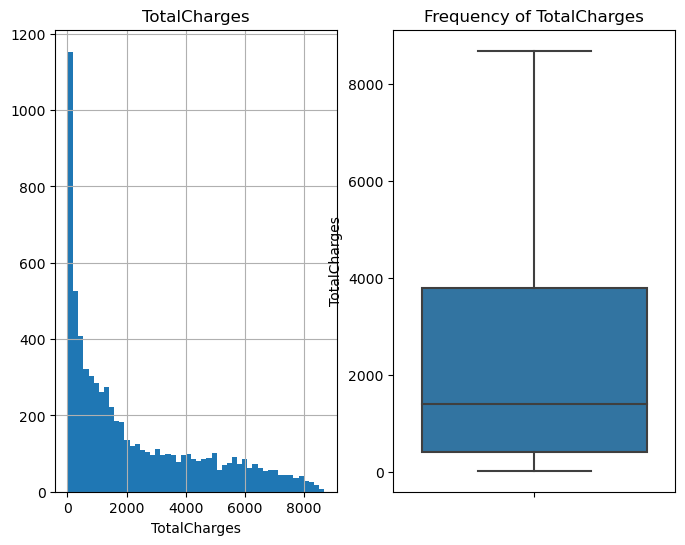

#####################################


In [284]:
#The num_summary function summarizes the numerical columns by displaying their descriptive statistics and 
#plots histograms and boxplots.
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

    print("#####################################")

for col in num_cols:
    num_summary(df, col, plot=True)


In [285]:
df.head(15)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [306]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

          tenure
Churn           
0      37.650010
1      17.979133


       MonthlyCharges
Churn                
0           61.307408
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094




In [307]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    print(col, check_outlier(df, col))
#No outliers in the data

tenure False
MonthlyCharges False
TotalCharges False


In [288]:
'''dff = df.copy()

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dtype=int, drop_first=drop_first)
    return dataframe

dff = one_hot_encoder(dff, cat_cols, drop_first=True)'''
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [309]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [310]:
#Splitting the data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size=0.30, random_state=17)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [311]:
df.info()
'''scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0              0        1           0 -1.280248             0   
1        1              0        0           0  0.064303             1   
2        1              0        0           0 -1.239504             1   
3        1              0        0           0  0.512486             0   
4        0              0        0           0 -1.239504             1   
5        0              0        0           0 -0.995040             1   
6        1              0        0           1 -0.424625             1   
7        0              0        0           0 -0.913552             0   
8        0              0        1           0 -0.180161             1   
9        1              0        0           1  1.205134             1   
10       1              0        1           1 -0.791321             1   
11       1              0        0           0 -0.669089             1   
12       1              0        1           0  1.042158             1   
13       1              0        0           0  0.675462             1   
14       1              0        0           0 -0.302393             1   
15       0              0        1           1  1.490341             1   
16       0              0        0           0  0.797694             1   
17       1              0        0           1  1.571829             1   
18       0              0        1           1 -0.913552             1   
19       0              0        0           0 -0.465369             1   
20       1              1        0           0 -1.280248             0   
21       1              0        1           0 -0.832064             1   
22       1              0        0           0 -1.280248             1   
23       0              0        1           0  1.042158             1   
24       1              0        1           1  0.675462             1   
25       0              0        0           0 -0.098673             1   
26       1              0        1           1  0.593974             1   
27       1              0        1           1 -1.280248             0   
28       1              0        1           0  1.612573             1   
29       0              0        0           1 -0.628345             1   

    MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0               2                1               2             1   
1               0                1               1             2   
2               0                1               1             1   
3               2                1               1             2   
4               0                2               2             2   
5               1                2               2             2   
6               1                2               2             1   
7               2                1               1             2   
8               1                2               2             2   
9               0                1               1             1   
10              0                1               1             2   
11              0                0               0             0   
12              1                2               2             2   
13              1                2               2             1   
14              0                2               1             2   
15              1                2               1             1   
16              0                0               0             0   
17              1                2               1             2   
18              0                1               2             2   
19              0                2               2             1   
20              2                1               2             2   
21              0                0               0             0   
22              0                0               0             0   
23              1                1               2             1   
24       

In [312]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.50, random_state=42)
'''
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)'''


'\nrf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)\ny_pred = rf_model.predict(X_test)'

In [313]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")



Accuracy: 0.77
Recall: 0.596
Precision: 0.44
F1: 0.51
Auc: 0.71


In [243]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")



Accuracy: 0.77
Recall: 0.596
Precision: 0.44
F1: 0.51
Auc: 0.71


In [315]:
models = [('LR', LogisticRegression()),  #List of applicable model types
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=200)),
          ('SVC', SVC()),
          ('GBM', GradientBoostingClassifier(n_estimators=200, learning_rate=0.06)),
          ("LightGBM", LGBMClassifier(random_state=42, force_row_wise=True)),
          ("XGBoost", XGBClassifier(learning_rate=0.06)),
          ("CatBoost", CatBoostClassifier(learning_rate=0.06,verbose=False))]
acclist=[]
for name, model in models:
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    acclist.append([name,acc])
    print(f"ACC: {round(acc, 4)} ({name}) ")
for name, model in models: #For checking the different model assessing parameters for the various different model types
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

ACC: 0.8039 (LR) 
ACC: nan (KNN) 
ACC: 0.7259 (CART) 
ACC: 0.7991 (RF) 
ACC: 0.7343 (SVC) 
ACC: 0.7993 (GBM) 
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Info] Number of positive: 1046, number of negative: 2891
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 3937, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265685 -> initscore=-1.016629
[LightGBM] [Info] Start training from score -1.016629
[LightGBM] [Info] Number of positive: 1046, number of negative: 2892
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 3938, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore

In [245]:
#Since GBM thats it has comparatively the best mix of 0.59 F1 score and also an accuracy of above 0.8005, LR should be the chosen model.
# Regressor model
'''clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)'''

In [ ]:
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

In [332]:
'''#Maximising the hyperparamters for the best results using LR 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
clf = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Train the final model with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predictions on the validation set added
y_val_pred = best_clf.predict(X_val)
y_test_pred = best_clf.predict(X_test)
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")'''

Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7885
Auc: 0.8281
Recall: 0.5104
Precision: 0.6272
F1: 0.5625


In [329]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
#Try to use RandomSearch
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Train the final model with the best parameters
best_gbm = grid_search.best_estimator_
best_gbm.fit(X_train, y_train)

# Predictions on the validation set added
y_test_pred = best_gbm.predict(X_test)



# Calculate and print performance metrics
test_f1 = f1_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")


Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.7885
Auc: 0.8281
Recall: 0.5104
Precision: 0.6272
F1: 0.5625


In [326]:
'''#Using XGBoost
# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 4]
}

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Train the final model with the best parameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train,)

# Predictions on the validation set added
y_test_pred = best_xgb.predict(X_test)

# Calculate and print performance metrics
test_f1 = f1_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")
'''

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 1.0}
Accuracy: 0.7885
Auc: 0.8281
Recall: 0.5104
Precision: 0.6272
F1: 0.5625


In [336]:
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

Accuracy: 0.7885
Auc: 0.8281
Recall: 0.5104
Precision: 0.6272
F1: 0.5625


In [335]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[688  87]
 [137 143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       775
           1       0.62      0.51      0.56       280

    accuracy                           0.79      1055
   macro avg       0.73      0.70      0.71      1055
weighted avg       0.78      0.79      0.78      1055



In [338]:
import joblib

# Specify the paths for saving the model and scaler
model_path = '/Users/mandarjoshi/Desktop/Cool_Coding_stuff/DataScience_internship/gbm_model.pkl'
scaler_path = '/Users/mandarjoshi/Desktop/Cool_Coding_stuff/DataScience_internship/scaler.pkl'

# Save the model and scaler
joblib.dump(best_gbm, model_path)
joblib.dump(scaler, scaler_path)

print(f"Model saved to {model_path}")
print(f"Scaler saved to {scaler_path}")


Model saved to /Users/mandarjoshi/Desktop/Cool_Coding_stuff/DataScience_internship/gbm_model.pkl
Scaler saved to /Users/mandarjoshi/Desktop/Cool_Coding_stuff/DataScience_internship/scaler.pkl


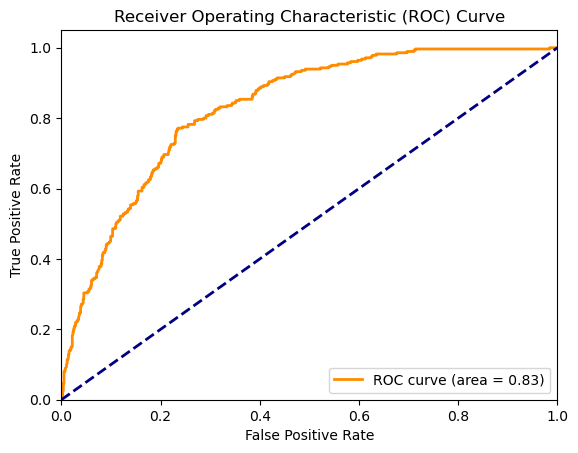

In [344]:
y_test_pred_prob = best_gbm.predict_proba(X_test)[:, 1]  # Get probability of positive class

fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [342]:
y_test_pred_prob = best_gbm.predict_proba(X_test)[:, 1]  # Get probability of positive class


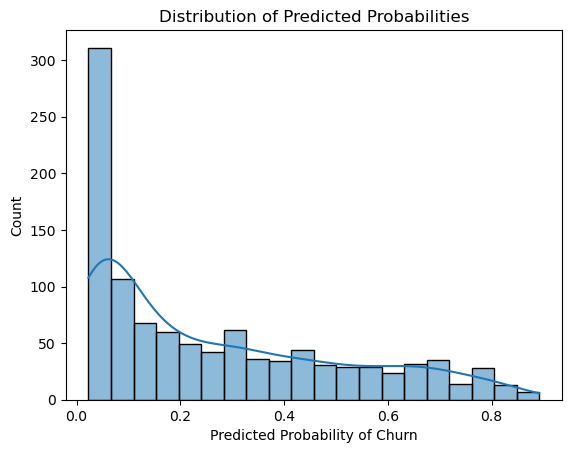

In [343]:
# Distribution of Prediction Probabilities
sns.histplot(y_test_pred_prob, kde=True, bins=20)
plt.xlabel('Predicted Probability of Churn')
plt.title('Distribution of Predicted Probabilities')
plt.show()